In [1]:
import numpy as np

In [2]:
import numpy as np

# Your provided pitch feature coordinates
bottom_left_12_box_point = np.array([319, 672, 69, 39])  # Format: x, y, width, height

# Your provided homography matrix
homography_matrix = np.array([
    [0.34523, 0.24001, 511.79],
    [0.26268, 0.75285, -484.6],
    [0.0029172, 0.028532, 1]
])

# Function to transform a point using homography
def transform_point_using_homography(homography_matrix, image_point_xywh):
    """
    Transform a point from image coordinates to world coordinates using a homography matrix.
    
    Args:
        homography_matrix: 3x3 homography matrix
        image_point_xywh: Point in [x, y, width, height] format
        
    Returns:
        Transformed point in world coordinates (X, Y)
    """
    # Extract the center of the bounding box
    x, y, w, h = image_point_xywh
    
    # Option 1: Center of bounding box
    center_x = x + w / 2
    center_y = y + h / 2
    
    # Option 2: Bottom center (feet position)
    bottom_center_x = x + w / 2
    bottom_center_y = y + h
    
    # Try both center and bottom center for comparison
    points_to_try = [
        ("Center", center_x, center_y),
        ("Bottom Center", bottom_center_x, bottom_center_y)
    ]
    
    results = []
    for point_name, point_x, point_y in points_to_try:
        # Create homogeneous coordinates [x, y, 1]
        homogeneous_point = np.array([point_x, point_y, 1])
        
        # Apply the homography transformation
        transformed_point = np.dot(homography_matrix, homogeneous_point)
        
        # Convert back to 2D coordinates by dividing by the third component
        world_x = transformed_point[0] / transformed_point[2]
        world_y = transformed_point[1] / transformed_point[2]
        
        results.append((point_name, world_x, world_y))
    
    return results

# Perform the transformation and verify results
transformation_results = transform_point_using_homography(homography_matrix, bottom_left_12_box_point)

print("Verification of Homography Transformation")
print("-----------------------------------------")
print(f"Image Point (x,y,w,h): {bottom_left_12_box_point}")
print("Homography Matrix:")
for row in homography_matrix:
    print(f"  {row}")
print("\nTransformation Results:")

for point_name, world_x, world_y in transformation_results:
    print(f"{point_name} Point:")
    print(f"  World Coordinates: X = {world_x:.2f}, Y = {world_y:.2f}")

# For comparison with expected values (if you know them)
# Assuming this point might be the left goal post which should be around (41.34, 0)
# in your world coordinate system
expected_world_point = (35.85, 5.5)  # Based on your world_points list
print("\nExpected Coordinates (if this is the Left Goal Post):")
print(f"  X = {expected_world_point[0]}, Y = {expected_world_point[1]}")

# Calculate error if this is indeed the left goal post
for point_name, world_x, world_y in transformation_results:
    error_x = abs(world_x - expected_world_point[0])
    error_y = abs(world_y - expected_world_point[1])
    print(f"\nError using {point_name} Point:")
    print(f"  X error: {error_x:.2f} meters")
    print(f"  Y error: {error_y:.2f} meters")
    print(f"  Total error: {np.sqrt(error_x**2 + error_y**2):.2f} meters")

Verification of Homography Transformation
-----------------------------------------
Image Point (x,y,w,h): [319 672  69  39]
Homography Matrix:
  [3.4523e-01 2.4001e-01 5.1179e+02]
  [ 2.6268e-01  7.5285e-01 -4.8460e+02]
  [0.0029172 0.028532  1.       ]

Transformation Results:
Center Point:
  World Coordinates: X = 36.75, Y = 5.92
Bottom Center Point:
  World Coordinates: X = 36.05, Y = 6.43

Expected Coordinates (if this is the Left Goal Post):
  X = 35.85, Y = 5.5

Error using Center Point:
  X error: 0.90 meters
  Y error: 0.42 meters
  Total error: 1.00 meters

Error using Bottom Center Point:
  X error: 0.20 meters
  Y error: 0.93 meters
  Total error: 0.95 meters


In [3]:
import pandas as pd
from mplsoccer import Sbopen, Pitch


In [4]:
parser = Sbopen()
competitions = parser.competition()
df_matches = parser.match(competition_id=11, season_id=90)
df_matches

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3773386,2020-10-31,2020-10-31 21:00:00,1,1,available,available,2023-07-25 03:54:59.280826,2023-07-25 04:25:41.348202,8,...,1,Regular Season,348,Estadio de Mendizorroza,214,Spain,NaN,NaN,NaN,NaN
1,3773565,2021-01-09,2021-01-09 18:30:00,0,4,available,available,2023-07-25 03:51:37.437064,2023-07-25 04:30:16.058384,18,...,1,Regular Season,4667,Estadio Nuevo Los Cármenes,214,Spain,2602.0,Ricardo De Burgos Bengoetxea,214.0,Spain
2,3773457,2021-05-16,2021-05-16 18:30:00,1,2,available,available,2022-12-02 09:26:39.496362,2023-04-27 23:03:53.506485,37,...,1,Regular Season,342,Spotify Camp Nou,214,Spain,NaN,NaN,NaN,NaN
3,3773631,2021-02-07,2021-02-07 21:00:00,2,3,available,available,2023-07-25 03:47:44.278651,2023-07-25 03:56:34.733180,22,...,1,Regular Season,352,Estadio Benito Villamarín,214,Spain,NaN,NaN,NaN,NaN
4,3773665,2021-03-06,2021-03-06 21:00:00,0,2,available,available,2022-12-02 08:46:42.897589,2023-04-28 02:57:03.412841,26,...,1,Regular Season,4650,Estadio El Sadar,214,Spain,2402.0,Guillermo Cuadra Fernández,214.0,Spain
5,3773497,2021-04-10,2021-04-10 21:00:00,2,1,available,available,2022-12-02 09:04:21.859831,2023-04-28 01:35:16.051381,30,...,1,Regular Season,5341,Estadio Alfredo Di Stéfano,214,Spain,183.0,Jesús Gil Manzano,214.0,Spain
6,3773660,2020-12-13,2020-12-13 21:00:00,1,0,available,available,2022-12-01 14:49:02.748131,2023-04-28 06:01:10.173360,13,...,1,Regular Season,342,Spotify Camp Nou,214,Spain,2602.0,Ricardo De Burgos Bengoetxea,214.0,Spain
7,3773593,2020-09-27,2020-09-27 21:00:00,4,0,available,available,2023-07-25 04:01:57.790373,2023-07-25 04:44:03.367478,3,...,1,Regular Season,342,Spotify Camp Nou,214,Spain,2402.0,Guillermo Cuadra Fernández,214.0,Spain
8,3773466,2020-10-01,2020-10-01 21:30:00,0,3,available,available,2023-07-25 03:55:25.794505,2023-07-25 04:40:53.635540,4,...,1,Regular Season,653,Abanca-Balaídos,214,Spain,2728.0,Carlos del Cerro Grande,214.0,Spain
9,3773585,2020-10-24,2020-10-24 16:00:00,1,3,available,available,2023-07-25 03:53:35.185506,2023-07-25 04:29:21.140321,7,...,1,Regular Season,342,Spotify Camp Nou,214,Spain,2434.0,Juan Martínez Munuera,214.0,Spain


In [5]:
all_shots = []
for match_id in df_matches['match_id']:
    df_events,__,__,__ = parser.event(match_id=match_id)
    df_shots = df_events[df_events['type_name'] == 'Shot']
    all_shots.append(df_shots)
la_liga_shots = pd.concat(all_shots, ignore_index=True)


In [6]:
la_liga_shots

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,shot_deflected,injury_stoppage_in_chain,pass_miscommunication,foul_committed_penalty,foul_won_penalty,block_save_block,dribble_no_touch,shot_redirect,shot_follows_dribble
0,c5341577-e1ca-4742-98fb-dc745cbbe103,575,1,00:12:19.834000,12,19,27,0.882096,3773386,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,681,1,00:16:07.385000,16,7,36,0.446744,3773386,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96b28bfc-d174-4b38-86cf-5a43cda4a14f,901,1,00:19:42.833000,19,42,41,1.366058,3773386,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b9ca5464-1f5a-401b-a31d-8101bd61072a,929,1,00:22:26.180000,22,26,44,0.616502,3773386,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75bdc651-c041-4021-b201-cb9eb8b97837,1282,1,00:30:06.585000,30,6,52,0.241490,3773386,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,5a1f50a7-d4c7-45e1-b225-618fcee47c24,3504,2,00:41:55.572000,86,55,146,2.160814,3773477,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,d035eb89-a5f2-4e27-a1e7-f56297aef835,3548,2,00:42:54.663000,87,54,148,0.388835,3773477,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,bd21c939-9b48-4e0f-aad0-061a6e4024d2,3591,2,00:44:06.076000,89,6,150,0.436118,3773477,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,a72ffe53-81e2-4c5d-8943-27e5bc6224f1,3621,2,00:45:32.043000,90,32,152,0.919748,3773477,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
la_liga_shots = la_liga_shots[['x', 'y', 'shot_statsbomb_xg', 'body_part_name']].copy()


In [8]:
la_liga_shots

,x,y,shot_statsbomb_xg,body_part_name
0,108.6,28.0,0.200969,Right Foot
1,103.6,51.0,0.096384,Right Foot
2,104.3,33.9,0.098879,Left Foot
3,97.9,44.3,0.078938,Left Foot
4,118.3,42.1,0.976192,Left Foot
...,...,...,...,...
834,107.5,41.8,0.035400,Head
835,111.5,49.2,0.098630,Right Foot
836,115.2,32.9,0.365302,Left Foot
837,99.2,30.4,0.032844,Right Foot


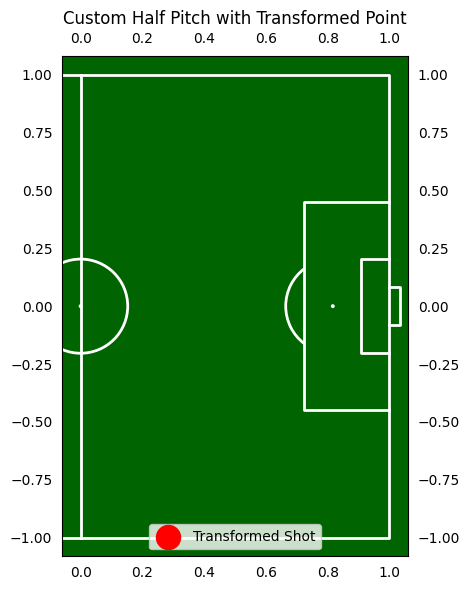

In [9]:
from mplsoccer import Pitch
from mplsoccer.dimensions import center_scale_dims
import matplotlib.pyplot as plt

dims = center_scale_dims(pitch_width=90, pitch_length=120,
                         width=2, length=2,
                         invert_y=False)

pitch = Pitch(pitch_type=dims,
              half=True,
              pitch_color='darkgreen',
              line_color='white',
              linewidth=2,
              goal_type='box',
              label=True,
              axis=True)

fig, ax = pitch.draw(figsize=(10, 6))
pitch.scatter([36.45], [39.0], ax=ax, color='red', marker='o', s=300, zorder=5, label='Transformed Shot')
ax.legend()
plt.title("Custom Half Pitch with Transformed Point")

# Function to print coordinates on click
def onclick(event):
    if event.inaxes == ax:
        print(f"Mouse clicked at: ({event.xdata:.2f}, {event.ydata:.2f})")

# Connect the click event to the function
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [10]:
world_points = [
    {"Left Corner Flag": [0,0]},   # Left corner flag
    {"Top Left 18-Box": [24.85,0]},  # Top Left 18-Box
    {"Top Left 12-Box" : [35.85,0]},  # Top Left 12-Box
    {"Bottom Left 18-Box" : [24.85, 16.5]}, # Bottom Left 18-Box
    {"Bottom Left 12-Box" : [35.85, 5.5]}, # Bottom Right 12-Box
    {"Left Goal Post" : [41.34, 0]},  # Left Goal Post
    {"Right Goal Post" : [48.66, 0]},  # Right Goal Post
    {"Top Right 12-Box" : [54.15, 0]},   # Top Right 12-Box
    {"Top Right 18-Box" : [65.15, 0]},  # Top Right 18-Box
    {"Bottom Right 12-Box" : [54.15, 5.5]},  # Bottom Right 12-Box
    {"Bottom Right 18-Box" : [65.15, 16.5]},  # Bottom Right 18-Box
    {"Right Corner Flag" : [90, 0]}  # Right corner flag
    ]
shot_bomb_pitch_points = [
    {"Left Corner Flag": [0,120]},   # Left corner flag
    {"Top Left 18-Box": [18,120]},  # Top Left 18-Box
    {"Top Left 12-Box" : [30,120]},  # Top Left 12-Box
    {"Bottom Left 18-Box" : [18, 120]}, # Bottom Left 18-Box
    {"Bottom Left 12-Box" : [30, 114]}, # Bottom Right 12-Box
    {"Left Goal Post" : [36, 120]},  # Left Goal Post
    {"Right Goal Post" : [43.32, 120]},  # Right Goal Post
    {"Top Right 12-Box" : [50, 120]},   # Top Right 12-Box
    {"Top Right 18-Box" : [62, 120]},  # Top Right 18-Box
    {"Bottom Right 12-Box" : [50, 114]},  # Bottom Right 12-Box
    {"Bottom Right 18-Box" : [62, 102]},  # Bottom Right 18-Box
    {"Right Corner Flag" : [80, 120]}  # Right corner flag
    ]

In [11]:
import numpy as np
import cv2

# Convert list of dicts to a flat dict
def merge_points_dict(point_list):
    return {list(d.keys())[0]: list(d.values())[0] for d in point_list}

# Merge into dicts
world_pts_dict = merge_points_dict(world_points)
sb_pts_dict = merge_points_dict(shot_bomb_pitch_points)

# Get common landmark keys
common_keys = list(set(world_pts_dict.keys()) & set(sb_pts_dict.keys()))

# Sort for consistent order
common_keys.sort()

# Extract corresponding coordinates
world_coords = np.array([world_pts_dict[k] for k in common_keys], dtype=np.float32)
sb_coords = np.array([sb_pts_dict[k] for k in common_keys], dtype=np.float32)

# Compute homography matrix using RANSAC
H, status = cv2.findHomography(sb_coords, world_coords, method=cv2.RANSAC)

# Print results
print("Homography matrix (StatsBomb → World):\n", H)
print("\nInlier mask:\n", status.ravel())


Homography matrix (StatsBomb → World):
 [[ 3.89446703e-01 -1.59961971e-01  2.69129467e+01]
 [-9.41729069e-04 -4.90096754e-01  5.88623979e+01]
 [-2.23999633e-03 -3.21583712e-03  1.00000000e+00]]

Inlier mask:
 [1 0 1 1 0 1 1 1 1 1 1 1]


In [ ]:
def transform_point_homography(pt, H):
    pt_h = np.array([pt[0], pt[1], 1.0])
    warped = H @ pt_h
    warped /= warped[2]
    return warped[:2]



Transformed point: [4.07483309e+01 3.16521869e-02]
